In [14]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

np.random.seed(42)

countries = ['France', 'Germany', 'Lithuania', 'Netherlands', 'Spain', 'Poland']
categories = ['Tops', 'Jeans', 'Sneakers', 'Dresses', 'Jackets', 'Bags']
brands = ['Zara', 'Nike', 'Adidas', 'H&M', 'Levi’s', 'Gucci', 'Balenciaga']
shipping_types = ['Standard', 'Pickup', 'Drop-off']

n = 10000
data = []

for i in range(n):
    item_id = 10000 + i
    user_id = f"u{np.random.randint(1000, 9999)}"
    country = np.random.choice(countries)
    category = np.random.choice(categories)
    brand = np.random.choice(brands)
    price = round(np.random.normal(loc=30, scale=15), 2)
    price = max(price, 3.0)

    posted = datetime.strptime('2024-01-01', '%Y-%m-%d') + timedelta(days=np.random.randint(0, 550))
    sold_chance = np.random.rand()
    if sold_chance < 0.75:
        days_to_sell = np.random.randint(1, 30)
        sold_date = posted + timedelta(days=days_to_sell)
    else:
        sold_date = None

    shipping = np.random.choice(shipping_types)
    likes = np.random.poisson(5)
    rating = round(np.random.normal(4.5, 0.4), 1)
    rating = min(max(rating, 1.0), 5.0)

    data.append([
        item_id, user_id, country, category, brand,
        price, posted.date(), sold_date.date() if sold_date else None,
        shipping, likes, rating
    ])

df = pd.DataFrame(data, columns=[
    'item_id', 'user_id', 'country', 'item_category', 'brand',
    'price_eur', 'date_posted', 'date_sold',
    'shipping_type', 'likes_count', 'user_rating'
])

df.to_csv('european_fashion_trends.csv', index=False)

df.head()


,item_id,user_id,country,item_category,brand,price_eur,date_posted,date_sold,shipping_type,likes_count,user_rating
0,10000,u8270,Netherlands,Jackets,Balenciaga,39.72,2024-05-01,2024-05-12,Drop-off,5,5.0
1,10001,u7949,Germany,Dresses,Levi’s,51.94,2024-09-09,2024-09-26,Drop-off,4,5.0
2,10002,u3734,Poland,Sneakers,H&M,68.39,2024-05-10,None,Drop-off,5,4.7
3,10003,u3612,Germany,Dresses,H&M,14.68,2025-05-23,None,Drop-off,6,4.4
4,10004,u7873,Netherlands,Jeans,Nike,33.28,2024-09-27,2024-10-20,Standard,9,4.9


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("european_fashion_trends.csv")

df['date_posted'] = pd.to_datetime(df['date_posted'])
df['date_sold'] = pd.to_datetime(df['date_sold'])

df['days_to_sell'] = (df['date_sold'] - df['date_posted']).dt.days

df['month_posted'] = df['date_posted'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month_posted'].apply(get_season)

print(df.shape)
print(df[['date_posted', 'month_posted', 'season', 'days_to_sell']].head())

sold_items = df[df['days_to_sell'].notnull()]
category_speed = sold_items.groupby('item_category')['days_to_sell'].mean().sort_values(ascending=True)


(10000, 14)
  date_posted  month_posted  season  days_to_sell
0  2024-05-01             5  Spring          11.0
1  2024-09-09             9  Autumn          17.0
2  2024-05-10             5  Spring           NaN
3  2025-05-23             5  Spring           NaN
4  2024-09-27             9  Autumn          23.0


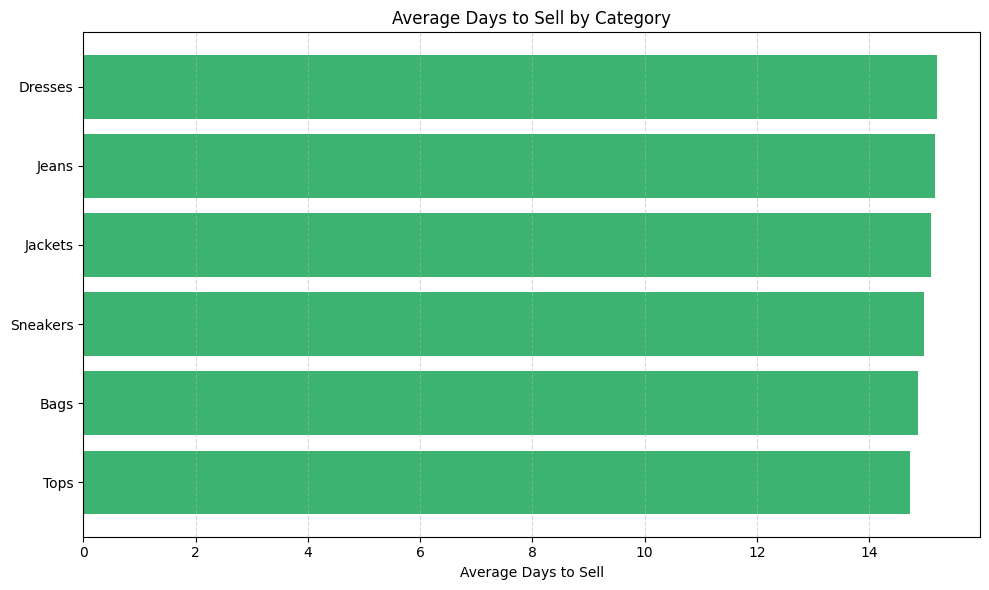

In [16]:
import matplotlib.pyplot as plt

sold_items = df[df['days_to_sell'].notnull()]
category_speed = sold_items.groupby('item_category')['days_to_sell'].mean().sort_values()

plt.figure(figsize=(10,6))
plt.barh(category_speed.index, category_speed.values, color='mediumseagreen')
plt.xlabel("Average Days to Sell")
plt.title("Average Days to Sell by Category")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

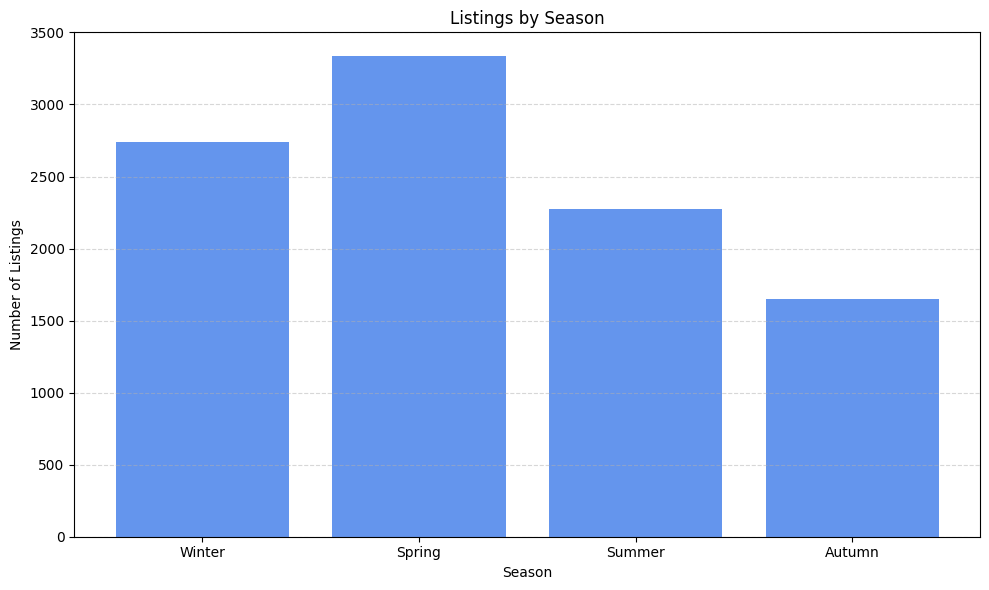

In [17]:
season_counts = df['season'].value_counts()
season_counts = season_counts.loc[['Winter', 'Spring', 'Summer', 'Autumn']]

plt.figure(figsize=(10, 6))
plt.bar(season_counts.index, season_counts.values, color='cornflowerblue')
plt.ylabel("Number of Listings")
plt.xlabel("Season")
plt.title("Listings by Season")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

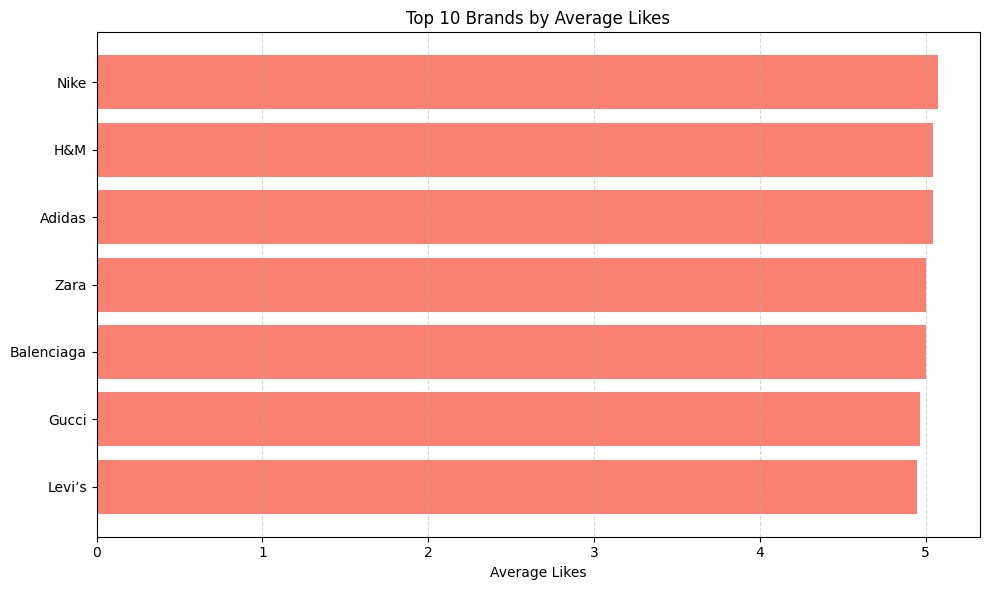

In [18]:
top_brands = df.groupby('brand')['likes_count'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_brands.index[::-1], top_brands.values[::-1], color='salmon')
plt.xlabel("Average Likes")
plt.title("Top 10 Brands by Average Likes")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()